In [1]:
import numpy as np
import xarray as xr
import pandas as pd 
import seaborn as sns
from scipy import optimize
from scipy import interpolate
import matplotlib.pyplot as plt 

In [2]:
with xr.open_dataset('./result/crmpt12/nc/crmpt12_1000a_dt_1_dx_100_MB_0.0_OFF.nc') as src: 
    # correct for minimum ice thickness
    src["depth"] = xr.where(src.depth <= 10, 0, src.depth)
    # apply sigma coordinate transform for vertical coordinate
    src["Z"]     = src.zbed + src.Z * src.height 
    # Calculate the magnitude of the velocity vectors
    src['vel_m'] = np.sqrt(src['velocity 1']**2 + src['velocity 2']**2)    
    
Vol = src.height.isel(coord_2=-1).integrate("coord_1") /\
      src.height.isel(coord_2=-1).isel(t=0).integrate("coord_1")

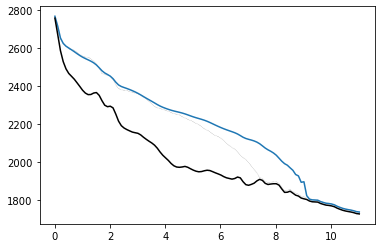

In [3]:
fig, ax = plt.subplots()
ax.plot(src.coord_1[::-1]/1000.,
        src.isel(t=0,coord_2=-1).Z,
        color='k', ls=':', lw=0.5, alpha = 0.5, label=r'$z_{\rm s}(t=0)$')


ax.plot(src.coord_1[::-1]/1000.,
        src.isel(t=300,coord_2=-1).Z,
        color='tab:blue',
        label="Cuffey and Paterson, (2010)")

ax.plot(src.coord_1[::-1]/1000.,
        src.isel(t=0,coord_2=-1).zbed,
        color='k', label=r'$z_{\rm b}$ - Flowline B')

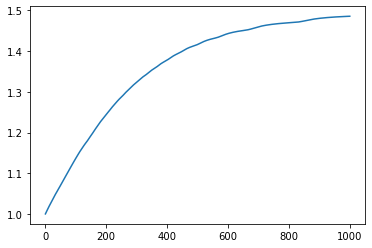

In [4]:
plt.plot(Vol.t, Vol)
